# Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

### Descenso de gradiente

Es el enfoque tradicional donde se calcula el gradiente de la función de pérdida respecto a todos los features de la data de entrenamiento. Actualiza los pesos del modelo después de procesor todos los features de entrenamiento.
#### Ventajas:
- Garantiza la convergencia al mínimo local o global.
- Utiliza de manera eficiente el hardware al aprovechar operaciones vectorizadas.
#### Desventajas:
- Requiere almacenar todos los datos de entrenamiento en memoria, lo que es un problema para conjuntos muy grandes.
- Debido a que debe almacenar y analizar todos los datos su coste computacional aumenta.

### Descenso de Gradiente por Mini Lotes

Es una variante intermedia en donde la gradiente y los pesos se calculan utilizando un subconjunto pequeño (mini - bache) y fijo de los ejemplos de entrenamiento.
Estos "mini-lotes" se eligen aleatoriamente en cada iteración del entrenamiento.
#### Ventajas:
- Utiliza menos memoria en comparación con la variante anterior, debido al menor uso de features.
- Aprovecha la eficiencia de las operaciones vectorizadas y paralelismo en hardware moderno.
- Mejora la convergencia en problemas no convexos al introducir variabilidad en el cálculo de del gradiente.

#### Desventajas:
- Debido a la variabilidad de los features durante el entrenamiento puede llegar a requerir el ajuste de la tasa de aprendizaje.
- No garantiza convergencia al mínimo global en problemas no convexos.

#### Referencia
- https://medium.com/metadatos/todo-lo-que-necesitas-saber-sobre-el-descenso-del-gradiente-aplicado-a-redes-neuronales-19bdbb706a78

### Descenso de Gradiente Estocástico

El gradiente y los pesos son calculados y actualizados utilizando solo un ejemplo de entrenamiento a la vez, el cual es elegido aleatoriamente en cada iteración.

#### Ventajas
- Debido a que solo utiliza un solo ejemplo por cada iteración utiliza mucha menos memoria que las variantes anteriores, lo que permite entrenar modelos de conjuntos muy grandes.
- Su alta variabilidad en las actualizaciones ayuda a evitar mínimos locales en problemas no convexos.
- Converge más rápido inicialmente debido a las actualizaciones de pesos más frecuentes.

#### Desventajas
- Su alta variabilidad hace que el proceso de aprendizaje sea menos estable y requiere ajustar la tasa de aprendizaje de forma cuidadosa.
- No garantiza convergencia en problemas no convexos y puede oscilar alrededor del mínimo global.
- Menor aprovechamiento del parelelismo.

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada

### Extración de caracteristicas

Consiste en transformar los datos originales en un conjunto de caracteristicas nuevas y más representativas. Se utilizan algoritmos como el análisis de componentes principales (PCA) o la descompisición de valor singular (SVD) para crear nuevas caracteristicas que conserven la información relevante del conjunto de datos original. 

#### Escenarios de uso 

- Cuando se tiene un conjunto de datos con muchas características redundantes.
- Para reducir la dimensionalidad y mejorar la eficiencia computacional.
- Cuando se busca representar los datos de manera más compacta.

### Selección de caracteristicas

Consiste elegir un subconjunto de las caracteristicas originales, eliminando las menos relevantes o redundantes. Se pueden utlizar tecnicas como regularización o pruebas estadísticas como prueba de t de Student. 

#### Escenarios

- Cuando se quiere mejorar la interpretabilidad del modelo eliminando características irrelevantes.
- Para reducir el riesgo de sobreajuste en modelos complejos.
- En situaciones donde hay muchas características pero solo unas pocas son realmente informativas.

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros

# Ejercicios Prácticos

## Task 2.1 - Gradiente descendiente estócastico

In [ ]:
# implementación de perceptrón de una capa

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# Cargar el conjunto de datos
iris = load_iris()

X = iris.data[:, :2]  # (sepal length y sepal width)
y = (iris.target == 0).astype(int)  # 1 si es setosa, 0 si no

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = Perceptron(eta0=0.1, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


In [ ]:

# 2*x**3-3*x**2+5*x+3

coeficients = [2, -3, 5, 3]

c:\Python311\Lib\site-packages\numpy\lib\polynomial.py:780: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
C:\Users\caste\AppData\Local\Temp\ipykernel_14520\3502994653.py:29: RuntimeWarning: invalid value encountered in subtract
  coefficients -= learning_rate * error * gradient  # Aquí estaba el error


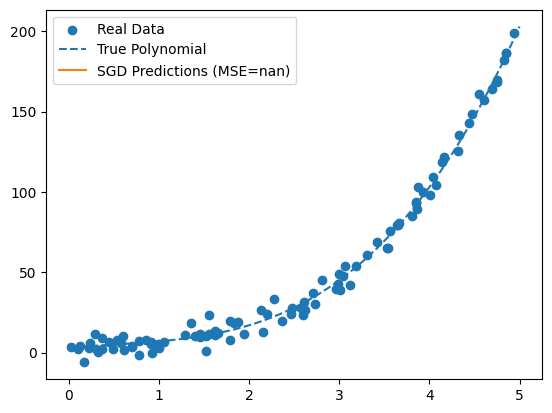

SGD Time: 68.4291 seconds, MSE: nan


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definir la función polinómica
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

# Generar datos de entrada
np.random.seed(42)
x_data = np.sort(5 * np.random.rand(100))
y_data = polynomial(x_data) + np.random.normal(scale=5, size=len(x_data))

# Definir la función para calcular el error cuadrático medio (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Descenso de gradiente estocástico (SGD)
def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=100):
    start_time = time.time()
    coefficients = [2, -3, 5, 3]  # Coeficientes para el polinomio de grado 3
    for epoch in range(epochs):
        for i in range(len(x)):
            xi = x[i]
            yi = y[i]
            prediction = np.polyval(coefficients, xi)
            error = prediction - yi
            gradient = xi**3  # Derivada del polinomio respecto a xi
            coefficients -= learning_rate * error * gradient  # Aquí estaba el error
    elapsed_time = time.time() - start_time
    return coefficients, elapsed_time

sgd_coefficients, sgd_time = stochastic_gradient_descent(x_data, y_data)
y_sgd_pred = np.polyval(sgd_coefficients, x_data)
mse_sgd = mean_squared_error(y_data, y_sgd_pred)


# Graficar la función real y las predicciones
plt.scatter(x_data, y_data, label='Real Data')
x_range = np.linspace(0, 5, 100)
plt.plot(x_range, polynomial(x_range), label='True Polynomial', linestyle='--')
plt.plot(x_range, np.polyval(sgd_coefficients, x_range), label=f'SGD Predictions (MSE={mse_sgd:.2f})')
plt.legend()
plt.show()

print(f"SGD Time: {sgd_time:.4f} seconds, MSE: {mse_sgd:.4f}")

## Task 2.2 - Feature Selection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datos = pd.read_csv('lol.csv')
datos.head(10)

In [ ]:
X = datos.iloc[:, 2:-1].values
y = datos.iloc[:, 1].values
print(X)
print(y)

### Selección de Características Univariate

## Task 2.3 - Perceptrón

Accuracy: 0.76
classification_report: 
               precision    recall  f1-score   support

           0       0.70      1.00      0.83        26
           1       1.00      0.42      0.59        19

    accuracy                           0.76        45
   macro avg       0.85      0.71      0.71        45
weighted avg       0.83      0.76      0.73        45



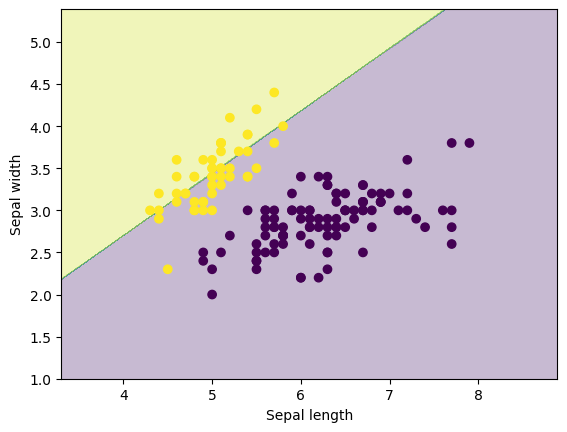

In [31]:
# implementación de perceptrón de una capa

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Perceptron
%matplotlib inline

# Cargar el conjunto de datos
iris = load_iris()

X = iris.data[:, :2]  # (sepal length y sepal width)
y = (iris.target == 0).astype(int)  # 1 si es setosa, 0 si no

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = Perceptron(eta0=0.1, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calcular la precisión del clasificador
print("classification_report: \n", classification_report(y_test, y_pred))

# Graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
